In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyberguard/test1.csv
/kaggle/input/cyberguard/train1.csv


In [2]:
df = pd.read_csv("/kaggle/input/cyberguard/test1.csv")
df

,category,sub_category,crimeaditionalinfo
0,RapeGang Rape RGRSexually Abusive Content,NaN,Sir namaskar mein Ranjit Kumar PatraPaise neh...
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...
...,...,...,...
31224,Online and Social Media Related Crime,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...
31225,Online Financial Fraud,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...
31226,Any Other Cyber Crime,Other,Mai Bibekbraj maine pahle ki complain kar chuk...
31227,Online Financial Fraud,Internet Banking Related Fraud,received URL link for updating KYC from mobile...


In [3]:
nunique_sub_category = df.groupby('category')['sub_category'].nunique().reset_index()

filtered_df = nunique_sub_category[nunique_sub_category['sub_category'] > 1]


In [4]:
valid_categories = nunique_sub_category[nunique_sub_category['sub_category'] > 1]['category'].tolist()

# Filter the original DataFrame to keep only those categories


In [5]:

filtered_original_df = df[df['category'].isin(valid_categories)]
filtered_original_df

,category,sub_category,crimeaditionalinfo
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
5,Online Financial Fraud,Internet Banking Related Fraud,My salary of amount has to be credited to my ...
6,Hacking Damage to computercomputer system etc,Unauthorised AccessData Breach,Due to some financial crisis I have applied lo...
...,...,...,...
31222,Online Financial Fraud,UPI Related Frauds,Deducted an amount of Rs from an Indian Ov...
31223,Online and Social Media Related Crime,FakeImpersonating Profile,Doing abusing messages to my friends \r\nCreat...
31224,Online and Social Media Related Crime,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...
31225,Online Financial Fraud,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...


In [14]:
filtered_original_df['category'].tolist()

NameError: name 'uniq' is not defined

In [6]:
nunique_sub_category = filtered_original_df.groupby('category')['sub_category'].nunique().reset_index()
nunique_sub_category

,category,sub_category
0,Crime Against Women & Children,3
1,Cyber Attack/ Dependent Crimes,7
2,Hacking Damage to computercomputer system etc,5
3,Online Financial Fraud,7
4,Online and Social Media Related Crime,10


In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch
tokenizer = AutoTokenizer.from_pretrained('l3cube-pune/hing-roberta')

tokenizer_config.json:   0%|          | 0.00/406 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [20]:
df = filtered_original_df
df.reset_index(drop = True, inplace=True)
df

,category,sub_category,crimeaditionalinfo
0,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
1,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
2,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
3,Online Financial Fraud,Internet Banking Related Fraud,My salary of amount has to be credited to my ...
4,Hacking Damage to computercomputer system etc,Unauthorised AccessData Breach,Due to some financial crisis I have applied lo...
...,...,...,...
24887,Online Financial Fraud,UPI Related Frauds,Deducted an amount of Rs from an Indian Ov...
24888,Online and Social Media Related Crime,FakeImpersonating Profile,Doing abusing messages to my friends \r\nCreat...
24889,Online and Social Media Related Crime,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...
24890,Online Financial Fraud,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...


In [42]:
df.loc[:, 'crimeaditionalinfo'] = df.apply(
    lambda row: f"{row['category']} {row['crimeaditionalinfo']}", axis=1
)
df

,category,sub_category,crimeaditionalinfo,label
0,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,Online Financial Fraud Online Financial Fraud ...,7
1,Cyber Attack/ Dependent Crimes,SQL Injection,Cyber Attack/ Dependent Crimes Cyber Attack/ D...,25
2,Online Financial Fraud,Fraud CallVishing,Online Financial Fraud Online Financial Fraud ...,14
3,Online Financial Fraud,Internet Banking Related Fraud,Online Financial Fraud Online Financial Fraud ...,17
4,Hacking Damage to computercomputer system etc,Unauthorised AccessData Breach,Hacking Damage to computercomputer system etc...,29
...,...,...,...,...
24887,Online Financial Fraud,UPI Related Frauds,Online Financial Fraud Online Financial Fraud ...,28
24888,Online and Social Media Related Crime,FakeImpersonating Profile,Online and Social Media Related Crime Online a...,13
24889,Online and Social Media Related Crime,Online Matrimonial Fraud,Online and Social Media Related Crime Online a...,21
24890,Online Financial Fraud,Internet Banking Related Fraud,Online Financial Fraud Online Financial Fraud ...,17


In [39]:
df['label'].value_counts

<bound method IndexOpsMixin.value_counts of 0         7
1        25
2        14
3        17
4        29
         ..
24887    28
24888    13
24889    21
24890    17
24891    17
Name: label, Length: 24892, dtype: int64>

    label  count                                       sub_category
0      28   8890                                 UPI Related Frauds
1       7   3556               DebitCredit Card FraudSim Swap Fraud
2      17   2973                     Internet Banking Related Fraud
3      14   1827                                  Fraud CallVishing
4       4   1366                  Cyber Bullying  Stalking  Sexting
5      11   1338                              EWallet Related Fraud
6      13    763                          FakeImpersonating Profile
7      22    751                     Profile Hacking Identity Theft
8       1    719                          Cheating by Impersonation
9      29    370                     Unauthorised AccessData Breach
10     20    294                                   Online Job Fraud
11      8    222                              DematDepository Fraud
12     15    200                                 Hacking/Defacement
13     27    194           Tampering with comput

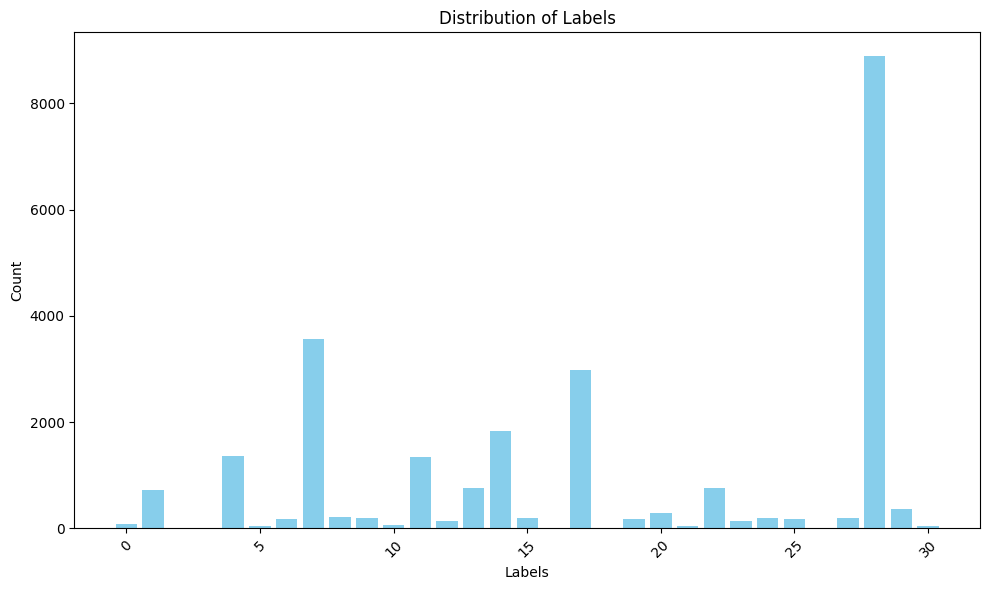

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert value_counts to a DataFrame
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']  # Rename columns

label_counts['sub_category'] = label_counts['label'].map(
    df.drop_duplicates(subset='label').set_index('label')['sub_category']
)
# Display the DataFrame
print(label_counts)

# Plot the counts as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(label_counts['label'], label_counts['count'], color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


In [46]:
 from sklearn.model_selection import train_test_split

# Assuming 'text' is the column with text data and 'label' has category labels
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['crimeaditionalinfo'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42
)


In [47]:
train_texts = [str(text) for text in train_texts]
val_texts = [str(text) for text in val_texts]

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)
print('done')

done


In [48]:
class CyberDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CyberDataset(train_encodings, train_labels)
val_dataset = CyberDataset(val_encodings, val_labels)


In [49]:
model = AutoModelForSequenceClassification.from_pretrained(
    'l3cube-pune/hing-roberta',
    num_labels=31  # Set number of categories
)


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at l3cube-pune/hing-roberta and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [50]:
training_args = TrainingArguments(
    output_dir='./results',           # Directory to save model checkpoints
    num_train_epochs=3,               # Number of epochs
    per_device_train_batch_size=16,   # Batch size for training
    per_device_eval_batch_size=16,    # Batch size for evaluation
    warmup_steps=500,                 # Warmup steps for learning rate scheduler
    weight_decay=0.01,                # Weight decay
    logging_dir='./logs',             # Directory for logs
    logging_steps=10,
    evaluation_strategy="epoch",      # Evaluate at the end of each epoch
    save_strategy="epoch",            # Save checkpoint every epoch
    load_best_model_at_end=True,
        report_to = []     # Load the best model after training
)


/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [51]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer

)


In [52]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,1.159400,1.046196
2,1.076100,0.977682
3,0.698800,0.977280


TrainOutput(global_step=3735, training_loss=1.0560527782363585, metrics={'train_runtime': 3656.9137, 'train_samples_per_second': 16.336, 'train_steps_per_second': 1.021, 'total_flos': 1.5722083975707648e+16, 'train_loss': 1.0560527782363585, 'epoch': 3.0})

In [54]:
import pandas as pd
from sklearn.metrics import classification_report
 
    
text = df['crimeaditionalinfo']  # Check for correct column name
test_encoding = tokenizer(text.tolist(), truncation=True, padding=True, max_length=512)  # Convert to list if necessary

# Extract labels
labels = df['label'].tolist()  # Ensure this is a list

# Create the dataset
test = CyberDataset(test_encoding, labels)

# Get predictions on the test set
predictions = trainer.predict(test)

# Extract predicted class labels
pred_labels = predictions.predictions.argmax(-1)

# Generate and print the classification report
unique_labels_in_val = list(set(labels))  # Ensure unique labels for report
print(classification_report(labels, pred_labels, labels=unique_labels_in_val, target_names=label_encoder.classes_))

                                                                      precision    recall  f1-score   support

                             Business Email CompromiseEmail Takeover       0.00      0.00      0.00        90
                                           Cheating by Impersonation       0.56      0.66      0.61       719
                                        Computer Generated CSAM/CSEM       0.00      0.00      0.00         2
                                    Cyber Blackmailing & Threatening       0.00      0.00      0.00         1
                                   Cyber Bullying  Stalking  Sexting       0.72      0.89      0.79      1366
                             Damage to computer computer systems etc       0.00      0.00      0.00        39
                                                   Data Breach/Theft       0.00      0.00      0.00       171
                                DebitCredit Card FraudSim Swap Fraud       0.83      0.81      0.82      3556
         

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
